In [4]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def preprocess_dataframe(filepath, stimulus):
    '''this function takes a .xlsx file from a given directory, transposes it and then drops the selected columns'''
    df = pd.read_excel(filepath)
    df_stimulus = df.loc[df['STIMULUS'] == stimulus, :]
    df_stimulus_transposed = df_stimulus.transpose()
    df_stimulus_transposed.columns = df_stimulus_transposed.iloc[0]
    df_stimulus_transposed = df_stimulus_transposed.drop(['FISH','STIMULUS'], axis=0)
    return df_stimulus_transposed

def draw_plots(clean_dataframe, color_palette):
    
    '''this function takes a dataframe and returns a subplots with linegraphs. In every graph, all of the subjects 
    (except one) are plotted in grey while the main subject of the graph is plotted as a coloured line depending on 
    the type of correct stimulus during the conditioning'''
    
    plt.style.use('seaborn-dark')
    palette = plt.get_cmap(color_palette)
    t = [n for n in range(21)]

    index=0
    for column in clean_dataframe: 
        index+=1
        plt.subplot(2,3,index)
        for col in clean_dataframe: 
            plt.plot(clean_dataframe.index, clean_dataframe[col], marker='', color='grey', linewidth=0.6, alpha=0.3)
        plt.plot(clean_dataframe.index, clean_dataframe[column], marker='', color=palette(index), linewidth=2.4, alpha=0.9, label=column)
        plt.xlim(-1,5)
        plt.ylim(-0.5,20,4)
        plt.yticks(np.arange(min(t), max(t)+1, 5))
        plt.axhline(15,linewidth=1,color='black',ls='--')
        plt.title(column, loc='left', fontsize=10, fontweight=0, color=palette(index))
        if index in range(1,4) :
            plt.tick_params(labelbottom='off')
        if index not in [1,4] :
            plt.tick_params(labelleft='off')

    plt.suptitle(f"Trained with {stimulus}", fontsize=13, fontweight=0, color='black', style='italic', y=1)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.3,
                        hspace=0.5)

    plt.show()

/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.5,20,4)


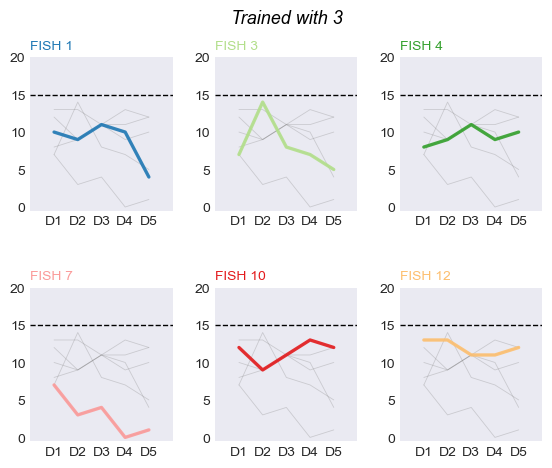

/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.5,20,4)


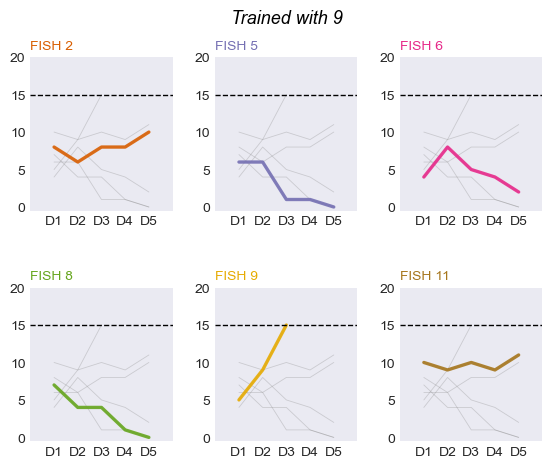

/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


<Figure size 640x480 with 0 Axes>

/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.5,20,4)


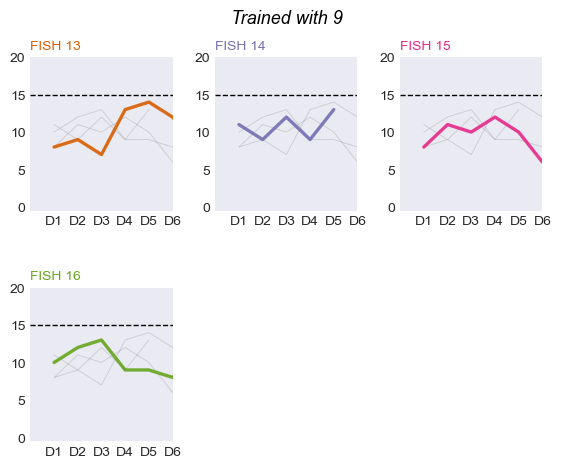

/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.5,20,4)


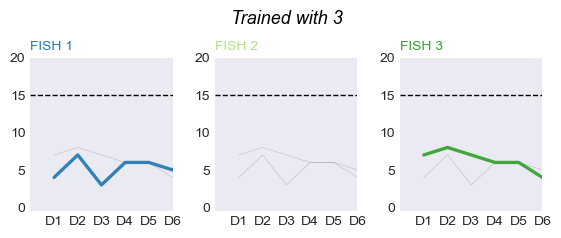

/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.5,20,4)


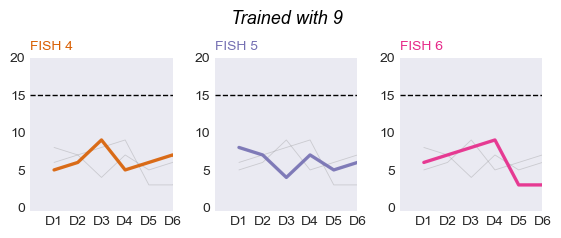

/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.5,20,4)


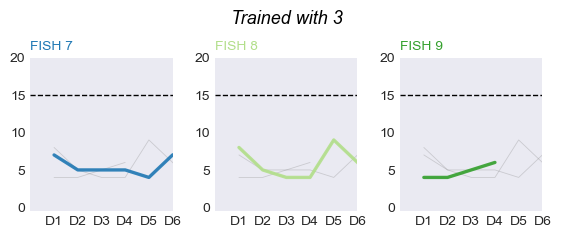

/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
/var/folders/1x/rg722hkj3nzgmyntdn84ff4w0000gn/T/ipykernel_78086/853410550.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.5,20,4)


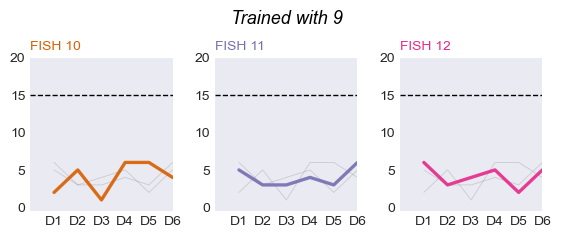

In [6]:
file1 = 'Data/corridoio_1_12.xlsx'
file2 = 'Data/corridoio_13_16.xlsx'
file3 = 'Data/Padova_1_8.xlsx'
file4 = 'Data/padova_hab_7_12.xlsx'

all_files = [file1, file2, file3, file4]
stimuli = [3,9]
for file in all_files:
    for stimulus in stimuli:
        if stimulus == 3:
            palette = 'Paired'
        else:
            palette = 'Dark2'
        dataframe = preprocess_dataframe(filepath=file, stimulus=stimulus)
        draw_plots(clean_dataframe=dataframe, color_palette=palette)
        plt.show()